In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Image
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.api as sm
from matplotlib_venn import venn3

In [2]:
df_all=pd.read_pickle('common_data/fivepseq_abundance_tsr.pkl')
df_High=df_all[(df_all.High>1) & (df_all.Low==0)]
df_Low=df_all[(df_all.Low>1) & (df_all.High==0)]
tpm_lo=['pt212_lo_TPM','pt221_lo_TPM','pt226_lo_TPM','pt87_lo_TPM','pt214_lo_TPM']
tpm_hi=['pt212_hi_TPM','pt221_hi_TPM','pt226_hi_TPM','pt87_hi_TPM','pt214_hi_TPM']
tpm=np.hstack((tpm_hi,tpm_lo))

/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/2717159169.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_High.append(df_Low)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/2717159169.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/2717159169.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/2717159169.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27

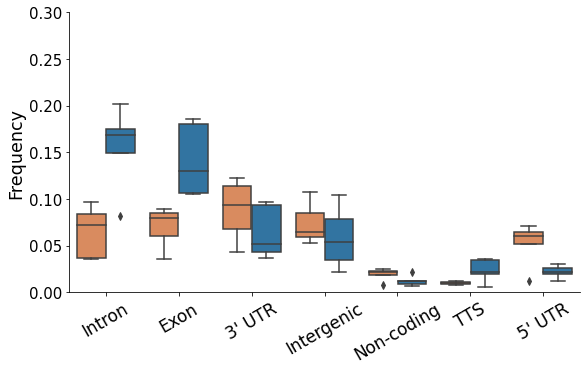

p-values:
intron - 0.005
exon - 0.007
3' UTR - 0.3
Intergeni - 0.419
non-coding - 0.162
TTS - 0.202
5' UTR - 0.024


In [3]:
df=df_High.append(df_Low)
df=df[(df.Aire_dep==True)]
masked_df=1*(df[tpm]>0)
feature='Annotations_short'
for i,name in enumerate(tpm):
    a,b=np.unique(df[masked_df[name]==1][feature],return_counts=1)
    x=pd.DataFrame(np.vstack((a,b/sum(b),[name]*len(a),[name.split('_')[1]]*len(a))).T,columns=['Feature','Percentage','Patient','Hue'])
    if i==0:
        y=x
    else:
        y=y.append(x)

order=['intron','exon',"3' UTR",'Intergeni','non-coding','TTS',"5' UTR"]
plt.figure(figsize=(8.25,5.25))
sns.boxplot(x='Feature',y='Percentage',hue='Hue',data=y[y.Feature!='promoter-TSS'],order=order,
           hue_order=['lo','hi'],palette=[sns.color_palette('muted')[1],sns.color_palette()[0]])
plt.xticks(np.arange(7),['Intron','Exon',"3' UTR",'Intergenic','Non-coding','TTS',"5' UTR"],rotation=30,fontsize=17)
plt.yticks(np.arange(0,.35,.05),fontsize=15)
plt.xlabel('')
plt.ylabel('Frequency',fontsize=17.5)
plt.ylim([0,0.3])
#plt.yscale('log')
sns.despine()
plt.tight_layout()
plt.legend('',frameon=False)
plt.tight_layout()
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig5A.pdf',transparent=True,dpi=500)
plt.show()
plt.close()
print('p-values:')
for x in order:
    print(x,'-',round(stats.ttest_ind(y[(y.Feature==x) & (y.Hue=='hi')].Percentage,y[(y.Feature==x) & (y.Hue=='lo')].Percentage)[1],3))

/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/2485802979.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_High.append(df_Low)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/2485802979.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/2485802979.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/2485802979.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27

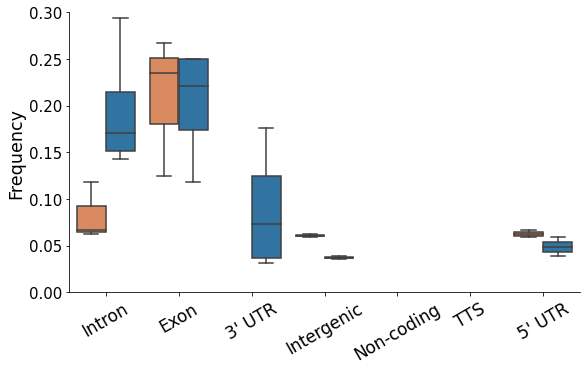

p-values:
intron - 0.049
exon - 0.905
3' UTR - nan
Intergeni - 0.009
non-coding - nan
TTS - nan
5' UTR - 0.183


In [4]:
df=df_High.append(df_Low)
df=df[(df.Fezf2_dep==True)]
masked_df=1*(df[tpm]>0)
feature='Annotations_short'
for i,name in enumerate(tpm):
    if df[masked_df[name]==1].shape[0]>10:
        a,b=np.unique(df[masked_df[name]==1][feature],return_counts=1)
        x=pd.DataFrame(np.vstack((a,b/sum(b),[name]*len(a),[name.split('_')[1]]*len(a))).T,columns=['Feature','Percentage','Patient','Hue'])
        if i==0:
            y=x
        else:
            y=y.append(x)

order=['intron','exon',"3' UTR",'Intergeni','non-coding','TTS',"5' UTR"]
plt.figure(figsize=(8.25,5.25))
sns.boxplot(x='Feature',y='Percentage',hue='Hue',data=y[y.Feature!='promoter-TSS'],order=order,
           hue_order=['lo','hi'],palette=[sns.color_palette('muted')[1],sns.color_palette()[0]])
plt.xticks(np.arange(7),['Intron','Exon',"3' UTR",'Intergenic','Non-coding','TTS',"5' UTR"],rotation=30,fontsize=17)
plt.yticks(np.arange(0,.35,.05),fontsize=15)
plt.xlabel('')
plt.ylabel('Frequency',fontsize=17.5)
plt.ylim([0,0.3])
sns.despine()
plt.tight_layout()
plt.legend('',frameon=False)
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig5B.pdf',transparent=True,dpi=500)
plt.show()
plt.close()
print('p-values:')
for x in order:
    print(x,'-',round(stats.ttest_ind(y[(y.Feature==x) & (y.Hue=='hi')].Percentage,y[(y.Feature==x) & (y.Hue=='lo')].Percentage)[1],3))

Ttest_relResult(statistic=11.09249838127094, pvalue=0.0003757180100445931)


/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/2747600808.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_High.append(df_Low)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/2747600808.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/2747600808.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/2747600808.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27

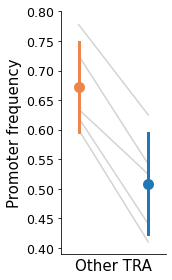

In [5]:
df=df_High.append(df_Low)
df=df[(df.Other_TRA==True)]
masked_df=1*(df[tpm]>0)
i=0
for feature in ['Annotations_short']:
    for name in tpm:
        if df[masked_df[name]==1].shape[0]>=0:
            #print(df[masked_df[name]==1].shape[0],name)
            percentage=np.sum(df[masked_df[name]==1][feature]=='promoter-TSS')/df[masked_df[name]==1].shape[0]
            x=pd.DataFrame(np.vstack((feature,percentage,name.split('_')[0],name.split('_')[1],name,df[masked_df[name]==1].shape[0])).T,columns=['Feature','Percentage','Patient','Hue','pt','N'])
            if i==0:
                y=x
            else:
                y=y.append(x)
            i+=1
y.Percentage=y.Percentage.astype(float)

plt.figure(figsize=(2.5,4))
feature='Annotations_short'
for x in y.Patient.unique():
    plt.plot([0.5,0.1],[y[(y.Feature==feature) & (y.Patient==x) & (y.Hue=='hi')].Percentage,y[(y.Feature==feature) & (y.Patient==x) & (y.Hue=='lo')].Percentage],color='lightgray',zorder=1)

plt.scatter(0.5,y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean(),lw=5,zorder=3)
plt.plot([0.5,0.5],[y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean()+y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.std(),
               y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean()-y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.std()],lw=3,zorder=2)

plt.scatter(.1,y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean(),lw=5,zorder=3,color=sns.color_palette('muted')[1])
plt.plot([.1,.1],[y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean()+y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.std(),
                y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean()-y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.std()],lw=3,zorder=2, color=sns.color_palette('muted')[1])
    
print(stats.ttest_rel(y[(y.Feature==feature) & (y.Hue=='lo')].Percentage,y[(y.Feature==feature) & (y.Hue=='hi')].Percentage))

plt.xlim([0,.6])
plt.ylim([.39,.8])
plt.xticks([])
plt.yticks(fontsize=12.5)
plt.xlabel('')
#plt.xlabel(fontsize=0)
plt.ylabel('Promoter frequency',fontsize=15)
plt.xlabel('Other TRA',fontsize=15)
sns.despine() 
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig5C_1.pdf',transparent=True,dpi=500)
plt.show()
plt.close()

/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/394195626.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_High.append(df_Low)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/394195626.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/394195626.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/394195626.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/

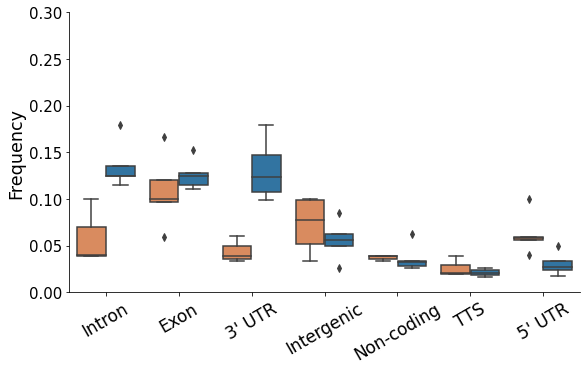

p-values:
intron - 0.011
exon - 0.373
3' UTR - 0.011
Intergeni - 0.381
non-coding - 0.959
TTS - 0.607
5' UTR - 0.039


In [6]:
df=df_High.append(df_Low)
df=df[(df.Other_TRA==True)]
masked_df=1*(df[tpm]>0)
feature='Annotations_short'
for i,name in enumerate(tpm):
    if df[masked_df[name]==1].shape[0]>10:
        a,b=np.unique(df[masked_df[name]==1][feature],return_counts=1)
        x=pd.DataFrame(np.vstack((a,b/sum(b),[name]*len(a),[name.split('_')[1]]*len(a))).T,columns=['Feature','Percentage','Patient','Hue'])
        if i==0:
            y=x
        else:
            y=y.append(x)

order=['intron','exon',"3' UTR",'Intergeni','non-coding','TTS',"5' UTR"]
plt.figure(figsize=(8.25,5.25))
sns.boxplot(x='Feature',y='Percentage',hue='Hue',data=y[y.Feature!='promoter-TSS'],order=order,
           hue_order=['lo','hi'],palette=[sns.color_palette('muted')[1],sns.color_palette()[0]])
plt.xticks(np.arange(7),['Intron','Exon',"3' UTR",'Intergenic','Non-coding','TTS',"5' UTR"],rotation=30,fontsize=17)
plt.yticks(np.arange(0,.35,.05),fontsize=15)
plt.xlabel('')
plt.ylabel('Frequency',fontsize=17.5)
plt.ylim([0,0.3])
sns.despine()
plt.tight_layout()
plt.legend('',frameon=False)
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig5C_2.pdf',transparent=True,dpi=500)
plt.show()
plt.close()
print('p-values:')
for x in order:
    print(x,'-',round(stats.ttest_ind(y[(y.Feature==x) & (y.Hue=='hi')].Percentage,y[(y.Feature==x) & (y.Hue=='lo')].Percentage)[1],3))

Ttest_relResult(statistic=5.825616832662318, pvalue=0.004324621331431714)


/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/3999332518.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_High.append(df_Low)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/3999332518.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/3999332518.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/3999332518.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27

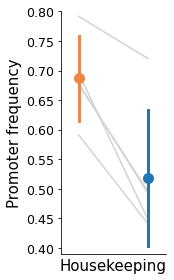

In [7]:
df=df_High.append(df_Low)
df=df[(df.Housekeeping==True)]
masked_df=1*(df[tpm]>0)
i=0
for feature in ['Annotations_short']:
    for name in tpm:
        if df[masked_df[name]==1].shape[0]>=0:
            #print(df[masked_df[name]==1].shape[0],name)
            percentage=np.sum(df[masked_df[name]==1][feature]=='promoter-TSS')/df[masked_df[name]==1].shape[0]
            x=pd.DataFrame(np.vstack((feature,percentage,name.split('_')[0],name.split('_')[1],name,df[masked_df[name]==1].shape[0])).T,columns=['Feature','Percentage','Patient','Hue','pt','N'])
            if i==0:
                y=x
            else:
                y=y.append(x)
            i+=1
y.Percentage=y.Percentage.astype(float)

plt.figure(figsize=(2.5,4))
feature='Annotations_short'
for x in y.Patient.unique():
    plt.plot([0.5,0.1],[y[(y.Feature==feature) & (y.Patient==x) & (y.Hue=='hi')].Percentage,y[(y.Feature==feature) & (y.Patient==x) & (y.Hue=='lo')].Percentage],color='lightgray',zorder=1)

plt.scatter(0.5,y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean(),lw=5,zorder=3)
plt.plot([0.5,0.5],[y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean()+y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.std(),
               y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.mean()-y[(y.Feature==feature) & (y.Hue=='hi')].Percentage.std()],lw=3,zorder=2)

plt.scatter(.1,y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean(),lw=5,zorder=3,color=sns.color_palette('muted')[1])
plt.plot([.1,.1],[y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean()+y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.std(),
                y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.mean()-y[(y.Feature==feature) & (y.Hue=='lo')].Percentage.std()],lw=3,zorder=2, color=sns.color_palette('muted')[1])
    
print(stats.ttest_rel(y[(y.Feature==feature) & (y.Hue=='lo')].Percentage,y[(y.Feature==feature) & (y.Hue=='hi')].Percentage))

plt.xlim([0,.6])
plt.ylim([.39,.8])
plt.xticks([])
plt.yticks(fontsize=12.5)
plt.xlabel('')
#plt.xlabel(fontsize=0)
plt.ylabel('Promoter frequency',fontsize=15)
plt.xlabel('Housekeeping',fontsize=15)
sns.despine() 
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig5D_1.pdf',transparent=True,dpi=500)
plt.show()
plt.close()

/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/379439350.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_High.append(df_Low)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/379439350.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/379439350.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/379439350.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y.append(x)
/var/folders/rc/xlxbh6n92qzbm6dh_qqcd56h0000gq/T/ipykernel_27764/

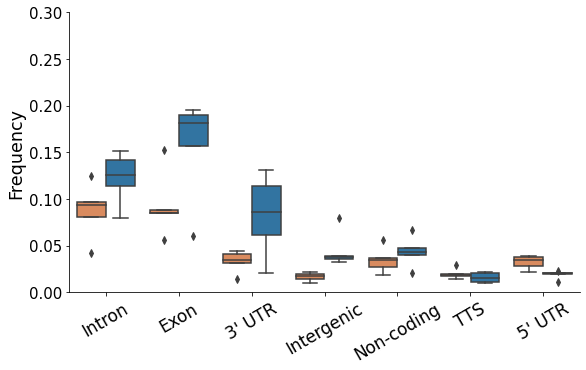

p-values:
intron - 0.094
exon - 0.065
3' UTR - 0.041
Intergeni - 0.028
non-coding - 0.378
TTS - 0.348
5' UTR - 0.006


In [8]:
df=df_High.append(df_Low)
df=df[(df.Housekeeping==True)]
masked_df=1*(df[tpm]>0)
feature='Annotations_short'
for i,name in enumerate(tpm):
    if df[masked_df[name]==1].shape[0]>10:
        a,b=np.unique(df[masked_df[name]==1][feature],return_counts=1)
        x=pd.DataFrame(np.vstack((a,b/sum(b),[name]*len(a),[name.split('_')[1]]*len(a))).T,columns=['Feature','Percentage','Patient','Hue'])
        if i==0:
            y=x
        else:
            y=y.append(x)

order=['intron','exon',"3' UTR",'Intergeni','non-coding','TTS',"5' UTR"]
plt.figure(figsize=(8.25,5.25))
sns.boxplot(x='Feature',y='Percentage',hue='Hue',data=y[y.Feature!='promoter-TSS'],order=order,
           hue_order=['lo','hi'],palette=[sns.color_palette('muted')[1],sns.color_palette()[0]])
plt.xticks(np.arange(7),['Intron','Exon',"3' UTR",'Intergenic','Non-coding','TTS',"5' UTR"],rotation=30,fontsize=17)
plt.yticks(np.arange(0,.35,.05),fontsize=15)
plt.xlabel('')
plt.ylabel('Frequency',fontsize=17.5)
plt.ylim([0,0.3])
sns.despine()
plt.tight_layout()
plt.legend('',frameon=False)
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig5D_2.pdf',transparent=True,dpi=500)
plt.show()
plt.close()
print('p-values:')
for x in order:
    print(x,'-',round(stats.ttest_ind(y[(y.Feature==x) & (y.Hue=='hi')].Percentage,y[(y.Feature==x) & (y.Hue=='lo')].Percentage)[1],3))